# Statsmodels TSA 时序模型

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm

In [4]:
df = sm.datasets.macrodata.load_pandas().data

In [5]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [6]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [7]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1','2009Q3'))

In [8]:
df.index = index

In [9]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


Text(0, 0.5, 'REAL GDP')

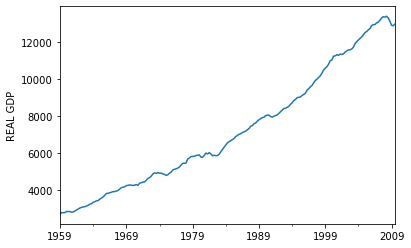

In [12]:
df['realgdp'].plot()
plt.ylabel('REAL GDP')

# Using statsmodels to get the trend
## Hodrick-Prescott Filter(HP滤波)

In [13]:
#低频——趋势——平稳，高频——噪声

In [14]:
#Tuple Packing
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df.realgdp)

In [15]:
gdp_cycle

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
                 ...    
2008-09-30    102.018455
2008-12-31   -107.269472
2009-03-31   -349.047706
2009-06-30   -397.557073
2009-09-30   -333.115243
Name: realgdp_cycle, Length: 203, dtype: float64

In [16]:
type(gdp_cycle)

pandas.core.series.Series

In [22]:
df['trend'] = gdp_trend

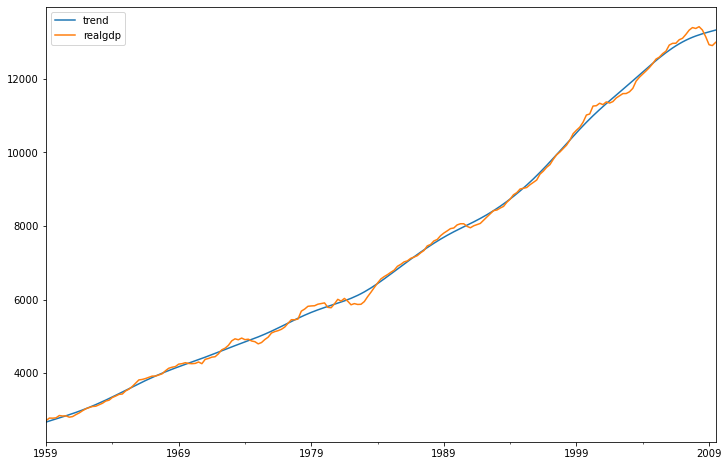

In [23]:
df[['trend','realgdp']].plot(figsize = (12,8))

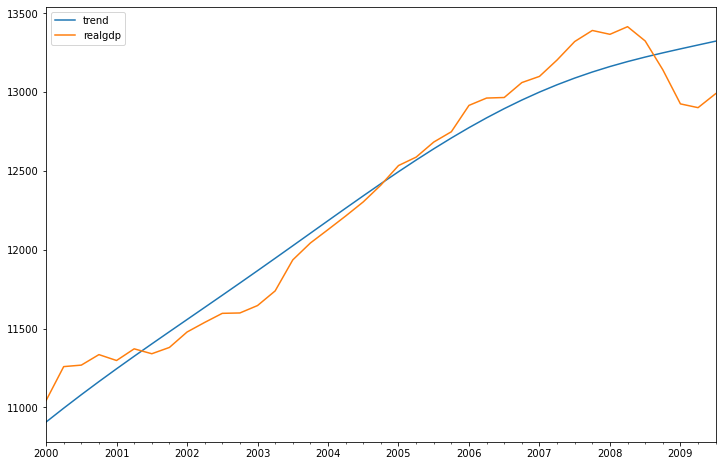

In [24]:
df[['trend','realgdp']]['2000-03-31':].plot(figsize=(12,8))

# ETS Model

## E:Error
## T:Trend
## S:Seasonality

## Exponen Tial Smooothing：指数平滑
## ETS 参数优化：AIC最小

In [25]:
airline = pd.read_csv("airline_passengers.csv",index_col = "Month",parse_dates = True)
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [26]:
airline.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-04', '1960-05', '1960-06', '1960-07', '1960-08', '1960-09',
       '1960-10', '1960-11', '1960-12',
       'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'],
      dtype='object', name='Month', length=145)

In [27]:
#转换成时间戳索引
airline.dropna(inplace = True)
airline.index = pd.to_datetime(airline.index)

In [28]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [29]:
#ETS Decomposition

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

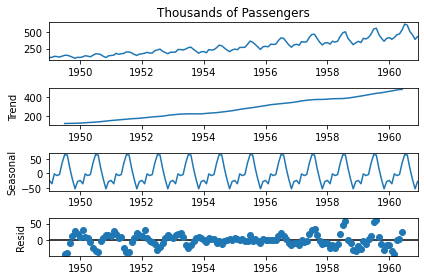

In [34]:
result = seasonal_decompose(airline['Thousands of Passengers'],model = 'additive')
fig = result.plot()

In [35]:
#SMA 普通移动平均  有滞后性

In [36]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window = 6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window = 12).mean()

In [37]:
airline.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,NaN,NaN
1949-03-01,132.0,NaN,NaN
1949-04-01,129.0,NaN,NaN
1949-05-01,121.0,NaN,NaN


In [38]:
airline.tail()

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1960-08-01,606.0,519.166667,463.333333
1960-09-01,508.0,534.000000,467.083333
1960-10-01,461.0,534.000000,471.583333
1960-11-01,390.0,520.333333,473.916667
1960-12-01,432.0,503.166667,476.166667


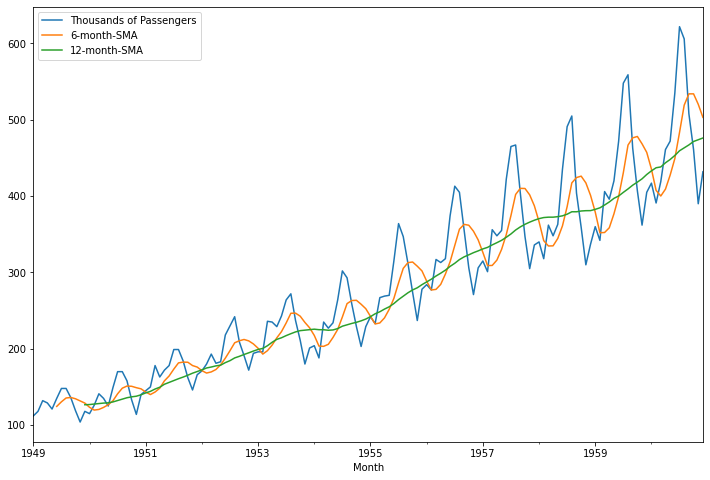

In [41]:
airline.plot(figsize=(12,8))

In [42]:
#EWMA  指数加权

#alpha：衰减值/指数平滑因子，一般不会直接指定alpha值
#com：center of mass（重心，质心） a = 1/(1+com)
#span：时间跨度，近似于SMA的窗口大小 a = 2/(span+1)
#halflife：权重衰减到一半时所用的时间 a = 1 - e^(log0.5/halflife)

In [43]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span = 12).mean()

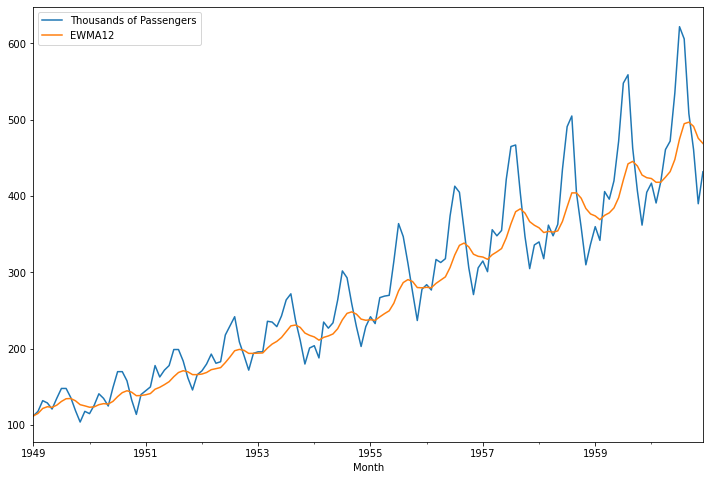

In [44]:
airline[['Thousands of Passengers','EWMA12']].plot(figsize=(12,8))  #y0 = x0

In [45]:
#ARMA--ARIMA
#ARMA:分析稳定数据
#ARIMA：处理不稳定的数据

#